## **1.Pre-Processing**

In [162]:
#UPLOADING DATA-SET
import pandas as pd

data = pd.read_csv('/content/titanic_data.csv')


In [163]:
#NUMBER OF ATTRIBUTES
num_attributes = data.shape[1]

print("Number of attributes:", num_attributes)


Number of attributes: 12


In [164]:
#TOTAL NO OF ROWS
num_rows = data.shape[0]

print("Number of rows:", num_rows)

Number of rows: 891


In [165]:
#NAME OF ALL ATTRIBUTES
attribute_names = data.columns

print("Attribute names:")
for attribute in attribute_names:
    print(attribute)

Attribute names:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


# 1.1-Data Cleaning

In [166]:
#SHAPE OF DATA-SET
dataset_shape = data.shape

print("Dataset shape:", dataset_shape)


Dataset shape: (891, 12)


In [167]:
#REMOVING MISSING VALUES
original_shape = data.shape

data1 = data.dropna()
removed_values = data[~data.index.isin(data1.index)]

print("Missing values removed:")
print(removed_values)

Missing values removed:
     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   A

In [168]:
#REMOVING DUPLICATE ROWS
columns_to_check_duplicates = ['Ticket', 'Cabin']
data2 = data1.drop_duplicates(subset=columns_to_check_duplicates, keep='first')
print("Duplicate values removed:")
print(data2)


Duplicate values removed:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
867          868         0       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                         

In [192]:
#REMOVING IRRELEVANT ATTRIBUTES
attributes_to_keep = [col for col in data.columns if col not in ['Name', 'Cabin', 'Ticket','PassengerId']]

data3 = data2[attributes_to_keep]
print(data3.head())

    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1          1       1  female  38.0      1      0  71.2833        C
3          1       1  female  35.0      1      0  53.1000        S
6          0       1    male  54.0      0      0  51.8625        S
10         1       3  female   4.0      1      1  16.7000        S
11         1       1  female  58.0      0      0  26.5500        S


In [193]:
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [194]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

fare_values = data3['Fare'].values.reshape(-1, 1)  # Reshape the fare column into a 2D array

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the fare values and transform the data
Fare1 = scaler.fit_transform(fare_values)

# Assign the normalized fare values back to the DataFrame
data3['Fare'] = Fare1
print(Fare1)
data3.head()

[[0.13913574]
 [0.1036443 ]
 [0.10122886]
 [0.03259623]
 [0.05182215]
 [0.02537431]
 [0.06929139]
 [0.51334181]
 [0.14976542]
 [0.12097534]
 [0.16293235]
 [0.02049464]
 [0.01493181]
 [0.11940565]
 [0.06764049]
 [0.12366717]
 [0.15085515]
 [0.10149724]
 [0.48312843]
 [0.02537431]
 [0.05130158]
 [0.1545881 ]
 [0.05074862]
 [0.12999454]
 [0.06538765]
 [0.05991421]
 [0.05604307]
 [0.07612293]
 [0.0541074 ]
 [0.28598956]
 [0.02042144]
 [0.06050797]
 [0.22109808]
 [0.14891148]
 [0.1756683 ]
 [0.1756683 ]
 [0.10257897]
 [0.05182215]
 [0.16883676]
 [0.15546645]
 [0.        ]
 [0.29953885]
 [0.26473857]
 [0.05797054]
 [0.15216447]
 [0.17777476]
 [0.02513033]
 [0.2958059 ]
 [0.21255864]
 [0.1111184 ]
 [0.16231419]
 [0.51212189]
 [0.32179837]
 [0.26252652]
 [0.26473857]
 [0.02537431]
 [0.11316786]
 [0.0556283 ]
 [0.29953885]
 [0.26252652]
 [0.06929139]
 [0.02537431]
 [0.10735285]
 [0.14687822]
 [0.13526459]
 [0.10821499]
 [0.41282051]
 [0.2342244 ]
 [0.01571255]
 [0.05182215]
 [0.10910953]
 [0.15

<ipython-input-194-08f14df55164>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Fare'] = Fare1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,0.139136,C
3,1,1,female,35.0,1,0,0.103644,S
6,0,1,male,54.0,0,0,0.101229,S
10,1,3,female,4.0,1,1,0.032596,S
11,1,1,female,58.0,0,0,0.051822,S


In [195]:
from google.colab import files
# Convert the DataFrame to a CSV file
data3.to_csv('pre-processed.csv', index=False)

# Download the CSV file
files.download('pre-processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
shape = data3.shape
print(shape)


(144, 8)


In [197]:
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,0.139136,C
3,1,1,female,35.0,1,0,0.103644,S
6,0,1,male,54.0,0,0,0.101229,S
10,1,3,female,4.0,1,1,0.032596,S
11,1,1,female,58.0,0,0,0.051822,S


# **2.Rule-Based Classification**

In [202]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'dataset'
# You can replace 'dataset' with the actual variable name of your dataset

# Create a new column to store the classification result
data3['classification'] = ''

# Apply the rules to classify each data point
for index, row in data3.iterrows():
    # Get the values from the row
    value1 = row['Survived']
    value2 = row['Pclass']
    value3 = row['Sex']
    value4 = row['Age']
    value5= row['SibSp']
    value6 = row['Parch']
    value7 = row['Fare']
    value8 = row['Embarked']

    # Apply the rules
    if value1 == 1 and value3 == "female":
        data3.at[index, 'classification'] = 'female survided'
    elif value1 == 1 and value3 == "male" :
        data3.at[index, 'classification'] = 'male survided'
    elif value1 > 50 and value1 == 1 and value3 == "female" :
        data3.at[index, 'classification'] = 'older women survival'
    elif value1 < 50 and value1 == 1 and value3 == "female" :
         data3.at[index, 'classification'] = ' younger  women survival'
    elif value1 > 50 and value1 == 1 and value3 == "male" :
        data3.at[index, 'classification'] = 'older men survival'
    elif value1 < 50 and value1 == 1 and value3 == "male" :
         data3.at[index, 'classification'] = ' younger men survival'
    elif value1 > 50 and value1 == 0 and value3 == "female" :
        data3.at[index, 'classification'] = 'older not women survival'
    elif value1 < 50 and value1 == 0 and value3 == "female" :
         data3.at[index, 'classification'] = ' younger not women survival'
    elif value1 > 50 and value1 == 0 and value3 == "male" :
        data3.at[index, 'classification'] = 'older men not survival'
    elif value1 < 50 and value1 == 0 and value3 == "male" :
         data3.at[index, 'classification'] = ' younger men  not survival'
    elif value8  == "S" and value6 == 0 :
        data3.at[index, 'classification'] = 'people with no family boarded'
    elif value8  == "S" and value6 == 1 :
        data3.at[index, 'classification'] = 'people with 1 family  member boarded'
    elif value8  == "S" and value6 == 2 :
        data3.at[index, 'classification'] = 'people with 2 family  member boarded'
    else:
        data3.at[index, 'classification'] = 'Unknown'

# Display the updated dataset with the classification results
print(data3)

     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
1           1       1  female  38.0      1      0  0.139136        C   
3           1       1  female  35.0      1      0  0.103644        S   
6           0       1    male  54.0      0      0  0.101229        S   
10          1       3  female   4.0      1      1  0.032596        S   
11          1       1  female  58.0      0      0  0.051822        S   
..        ...     ...     ...   ...    ...    ...       ...      ...   
867         0       1    male  31.0      0      0  0.098561        S   
872         0       1    male  33.0      0      0  0.009759        S   
879         1       1  female  56.0      0      1  0.162314        C   
887         1       1  female  19.0      0      0  0.058556        S   
889         1       1    male  26.0      0      0  0.058556        C   

                 classification  
1               female survided  
3               female survided  
6     younger men  not survival  

<ipython-input-202-11075a705532>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['classification'] = ''


In [200]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'dataset'
# You can replace 'dataset' with the actual variable name of your dataset

# Create a new column to store the classification result
data3['classification'] = ''

# Apply the rules to classify each data point
for index, row in data3.iterrows():
    # Get the values from the row
    value1 = row['Survived']
    value2 = row['Pclass']
    value3 = row['Sex']
    value4 = row['Age']
    value5= row['SibSp']
    value6 = row['Parch']
    value7 = row['Fare']
    value8 = row['Embarked']

    # Apply the rules
    if value1 == 1 and value3 == "female":
        data3.at[index, 'classification'] = 'female survided'
    elif value1 == 1 and value3 == "male" :
        data3.at[index, 'classification'] = 'male survided'
    elif value1 > 50 and value1 == 1 and value3 == "female" :
        data3.at[index, 'classification'] = 'older women survival'
    elif value1 < 50 and value1 == 1 and value3 == "female" :
         data3.at[index, 'classification'] = ' younger  women survival'
    elif value1 > 50 and value1 == 1 and value3 == "male" :
        data3.at[index, 'classification'] = 'older men survival'
    elif value1 < 50 and value1 == 1 and value3 == "male" :
         data3.at[index, 'classification'] = ' younger men survival'
    elif value8  == "S" and value6 == 0 :
        data3.at[index, 'classification'] = 'people with no family boarded'
    elif value8  == "S" and value6 == 1 :
        data3.at[index, 'classification'] = 'people with 1 family  member boarded'
    elif value8  == "S" and value6 == 2 :
        data3.at[index, 'classification'] = 'people with 2 family  member boarded'
    else:
        data3.at[index, 'classification'] = 'Unknown'

# Display the updated dataset with the classification results
print(data3)

     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
1           1       1  female  38.0      1      0  0.139136        C   
3           1       1  female  35.0      1      0  0.103644        S   
6           0       1    male  54.0      0      0  0.101229        S   
10          1       3  female   4.0      1      1  0.032596        S   
11          1       1  female  58.0      0      0  0.051822        S   
..        ...     ...     ...   ...    ...    ...       ...      ...   
867         0       1    male  31.0      0      0  0.098561        S   
872         0       1    male  33.0      0      0  0.009759        S   
879         1       1  female  56.0      0      1  0.162314        C   
887         1       1  female  19.0      0      0  0.058556        S   
889         1       1    male  26.0      0      0  0.058556        C   

                    classification  
1                  female survided  
3                  female survided  
6    people with no fami

<ipython-input-200-b2677fccec0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['classification'] = ''


In [203]:
from google.colab import files
# Convert the DataFrame to a CSV file
data3.to_csv('Rule-based-classification.csv', index=False)

# Download the CSV file
files.download('Rule-based-classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score

# Get the actual and predicted values
actual = data3['Survived']
predicted = data3['classification']

# Calculate the accuracy
accuracy = accuracy_score(actual, predicted)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.0


# **3.Association Rules**

In [225]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming your dataset is a list of lists called 'dataset'
# You can replace 'dataset' with the actual variable name of your dataset

# Convert the dataset into a DataFrame
df = pd.DataFrame(data3)

# Convert non-zero values to True and zero values to False
df = df.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules from frequent itemsets
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
print(association_rules)


                  antecedents  \
0                    (Pclass)   
1                  (Survived)   
2                       (Sex)   
3                  (Survived)   
4                       (Age)   
...                       ...   
6045  (classification, Parch)   
6046        (Embarked, Parch)   
6047             (Parch, Age)   
6048          (Parch, Pclass)   
6049                  (Parch)   

                                            consequents  antecedent support  \
0                                            (Survived)            1.000000   
1                                              (Pclass)            0.645833   
2                                            (Survived)            1.000000   
3                                                 (Sex)            0.645833   
4                                            (Survived)            1.000000   
...                                                 ...                 ...   
6045       (Sex, Fare, Survived, Embarked, Age, Pc

In [227]:
# Specify the file path and name for the CSV file
output_file = 'association_rules.csv'

# Save the association rules to a CSV file
association_rules.to_csv(output_file, index=False)

In [228]:
from google.colab import files


# Download the CSV file
files.download('association_rules.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming your data is a DataFrame called 'df' with attribute names as columns
# Extract the attribute names from the DataFrame
attributes = data3.columns.tolist()

# Convert the DataFrame into a list of transactions, where each transaction is a list of attribute names
transactions = data3.values.tolist()

# Convert your transactions data into a binary encoded format
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules based on attribute names
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the resulting association rules
print(rules)


  antecedents consequents  antecedent support  consequent support   support  \
0       (0.0)       (1.0)            1.000000            0.895833  0.895833   
1       (1.0)       (0.0)            0.895833            1.000000  0.895833   
2       (2.0)       (0.0)            0.201389            1.000000  0.201389   

   confidence  lift  leverage  conviction  
0    0.895833   1.0       0.0         1.0  
1    1.000000   1.0       0.0         inf  
2    1.000000   1.0       0.0         inf  


# **4.Generating Cluster**

In [243]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import files

# Assuming you have the necessary dataset for clustering

# Read the association rules from the CSV file
association_rules = pd.read_csv('/content/Rule-based-classification.csv')

# Select the relevant features for clustering
features = association_rules[['Survived', 'Pclass', 'Age', 'Parch']]  # Replace 'feature1', 'feature2', 'feature3' with actual feature names

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Replace 3 with the desired number of clusters
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the association rules
association_rules['cluster'] = clusters

# Save the association rules with cluster labels to a new CSV file
output_file = 'association_rules_with_clusters.csv'
association_rules.to_csv(output_file, index=False)

# Download the CSV file
files.download(output_file)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5.**Visualization**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


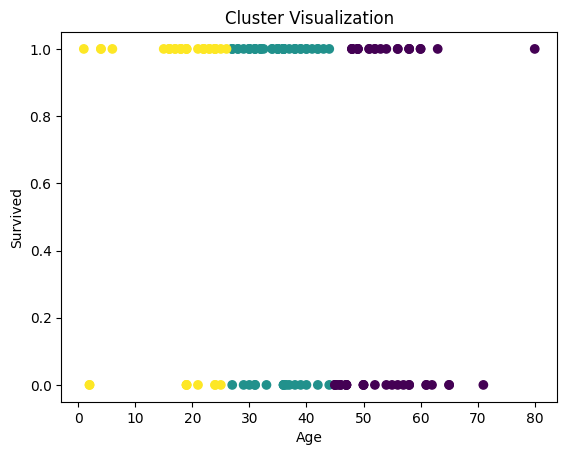

In [250]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have the necessary dataset for clustering

# Read the association rules from the CSV file
association_rules = pd.read_csv('/content/Rule-based-classification.csv')

# Select the relevant features for clustering
features = association_rules[['Survived', 'Pclass', 'Age', 'Parch']]  # Replace 'feature1', 'feature2', 'feature3' with actual feature names

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Replace 3 with the desired number of clusters
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the association rules
association_rules['cluster'] = clusters

# Visualize the clusters
plt.scatter(association_rules['Age'], association_rules['Survived'], c=clusters)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Cluster Visualization')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


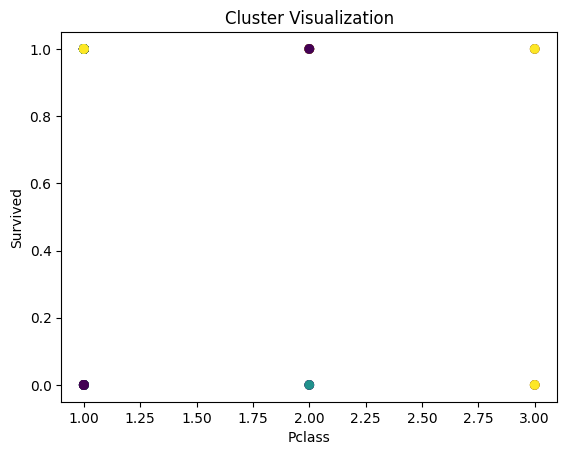

In [252]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have the necessary dataset for clustering

# Read the association rules from the CSV file
association_rules = pd.read_csv('/content/Rule-based-classification.csv')

# Select the relevant features for clustering
features = association_rules[['Survived', 'Pclass', 'Age', 'Parch']]  # Replace 'feature1', 'feature2', 'feature3' with actual feature names

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Replace 3 with the desired number of clusters
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the association rules
association_rules['cluster'] = clusters

# Visualize the clusters
plt.scatter(association_rules['Pclass'], association_rules['Survived'], c=clusters)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Cluster Visualization')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


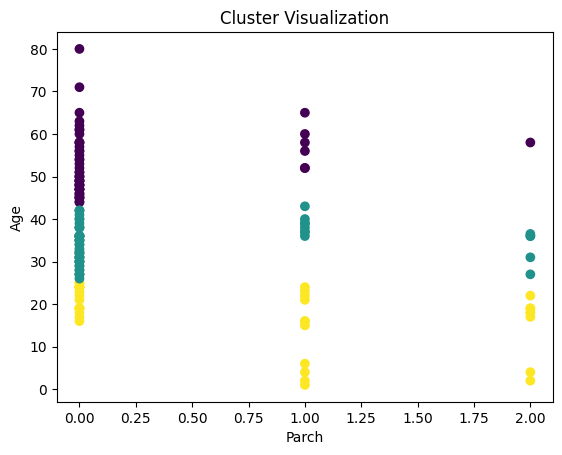

In [254]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have the necessary dataset for clustering

# Read the association rules from the CSV file
association_rules = pd.read_csv('/content/Rule-based-classification.csv')

# Select the relevant features for clustering
features = association_rules[['Survived', 'Pclass', 'Age', 'Parch']]  # Replace 'feature1', 'feature2', 'feature3' with actual feature names

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Replace 3 with the desired number of clusters
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the association rules
association_rules['cluster'] = clusters

# Visualize the clusters
plt.scatter(association_rules['Parch'], association_rules['Age'], c=clusters)
plt.xlabel('Parch')
plt.ylabel('Age')
plt.title('Cluster Visualization')
plt.show()
